In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import datetime as dt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
ticker = 'AAPL'

In [3]:
data =  yf.download(tickers=ticker, start=start, end=end)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.565702,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.873642,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.875893,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.210680,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.140915,237458000
...,...,...,...,...,...,...
2023-04-14,164.589996,166.320007,163.820007,165.210007,165.210007,49337200
2023-04-17,165.089996,165.389999,164.029999,165.229996,165.229996,41516200
2023-04-18,166.100006,167.410004,165.649994,166.470001,166.470001,49923000


In [4]:
prices = data['Close'].values

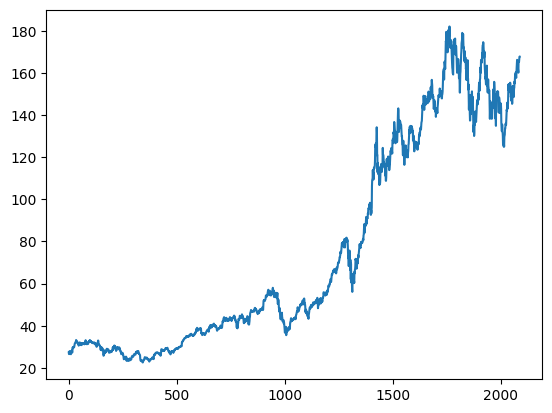

In [5]:
plt.plot(prices)

In [6]:
training_size = int(np.ceil(len(prices) * 0.9))

In [7]:
train_data = prices[0:training_size]


In [8]:
x_train = []
y_train = []
 
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
tf.keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dense(1))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fc70705db20>>

In [10]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=12)

Epoch 1/12
57/57 [==============================] - 15s 95ms/step - loss: 4013.4939
Epoch 2/12
57/57 [==============================] - 6s 108ms/step - loss: 1687.2548
Epoch 3/12
57/57 [==============================] - 5s 89ms/step - loss: 241.2617
Epoch 4/12
57/57 [==============================] - 6s 106ms/step - loss: 76.5087
Epoch 5/12
57/57 [==============================] - 5s 90ms/step - loss: 54.8646
Epoch 6/12
57/57 [==============================] - 6s 105ms/step - loss: 51.7662
Epoch 7/12
57/57 [==============================] - 5s 90ms/step - loss: 46.8326
Epoch 8/12
57/57 [==============================] - 6s 104ms/step - loss: 44.0132
Epoch 9/12
57/57 [==============================] - 5s 89ms/step - loss: 40.1596
Epoch 10/12
57/57 [==============================] - 6s 102ms/step - loss: 38.1055
Epoch 11/12
57/57 [==============================] - 5s 94ms/step - loss: 43.8693
Epoch 12/12
57/57 [==============================] - 5s 92ms/step - loss: 36.3485


In [24]:

test_data = prices[training_size - 60:]
x_test = []
y_test = prices[training_size:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])
 
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
 
# predict the testing data
predictions = model.predict(x_test)
 
# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))

#15

7/7 [==============================] - 0s 29ms/step
MSE 181.96357273132975
RMSE 13.489387411270007


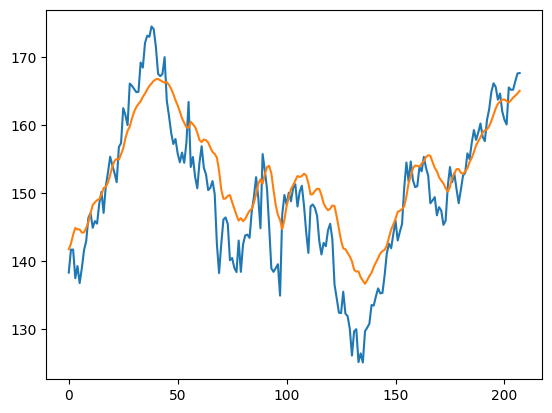

In [25]:
plt.plot(prices[training_size:])
plt.plot(predictions)
